## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
from functools import partial, reduce

import numpy as np
import pandas as pd
from fastai.vision import *

In [3]:
np.random.seed(303)

In [4]:
dataroot = Path('../data').resolve()

In [5]:
tfms = get_transforms(max_lighting=0.05, max_rotate=.5, max_zoom=1.05, max_warp=0.)

In [6]:
bs = 64

In [7]:
arch = models.resnet50

In [8]:
src = (ImageItemList
       .from_csv(dataroot, 'labels.csv', folder='images', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(label_delim=' '))

In [9]:
data = (src
        .transform(tfms, size=128, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

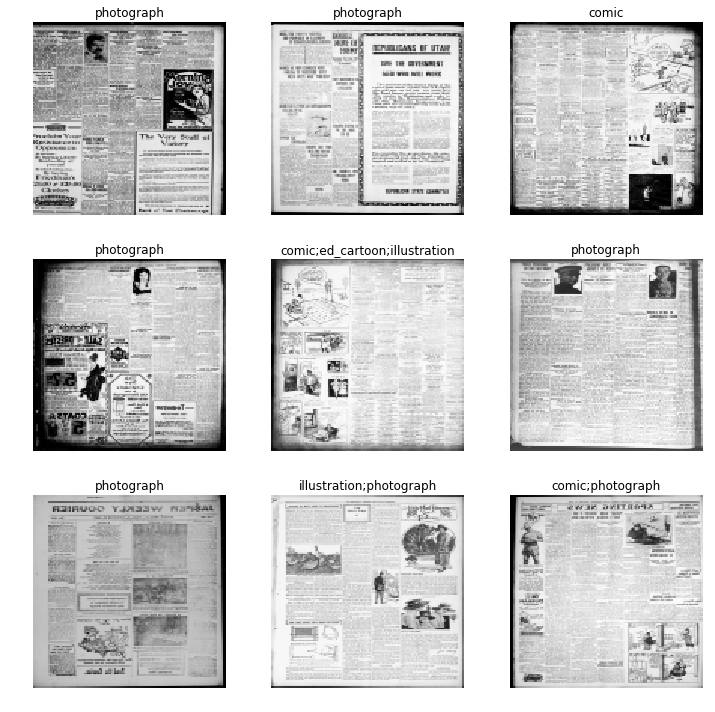

In [10]:
data.show_batch(rows=3, figsize=(10, 10))

In [11]:
acc_fn = partial(accuracy_thresh, thresh=0.2)
f_score_fn = partial(fbeta, beta=2, thresh=0.2)

In [12]:
learn = create_cnn(data, arch, metrics=[acc_fn, f_score_fn])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


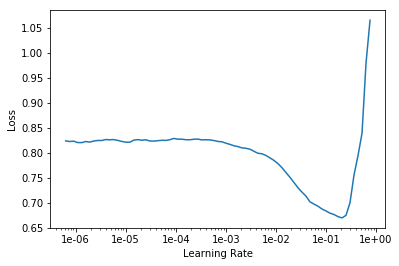

In [13]:
lrf = learn.lr_find()
learn.recorder.plot()

In [14]:
lr = 1e-2

In [15]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.775951,0.640195,0.343511,0.552402
2,0.560570,0.353025,0.853435,0.754861
3,0.453228,0.340471,0.850382,0.756056
4,0.390361,0.307754,0.853435,0.782093
5,0.352765,0.294308,0.844275,0.797460


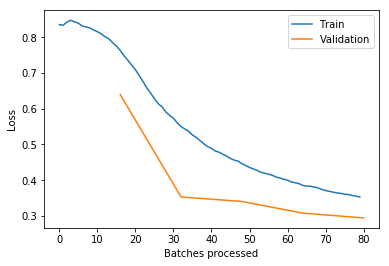

In [16]:
learn.recorder.plot_losses()

In [17]:
learn.save('res50-128-frozen')

-------

In [18]:
# _ = learn.load('res50-128-frozen')

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


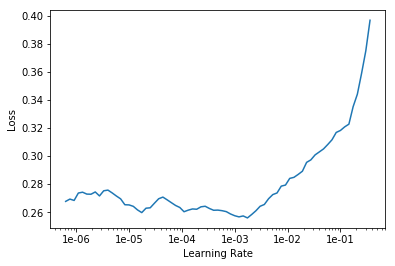

In [ ]:
lrf = learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(4e-5, lr / 5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.265547,0.294060,0.861832,0.794824
2,0.251440,0.313097,0.850382,0.791916
3,0.228940,0.291871,0.865649,0.804027
4,0.196780,0.283114,0.878626,0.822732
5,0.165892,0.278097,0.874809,0.812005


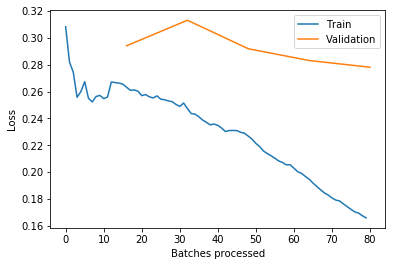

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('res50-128-unfrozen')

--------

In [ ]:
_ = learn.load('res50-128-unfrozen')

In [ ]:
data = (src.transform(tfms, size=256, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=bs // 2).normalize(imagenet_stats))

learn.data = data

In [ ]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


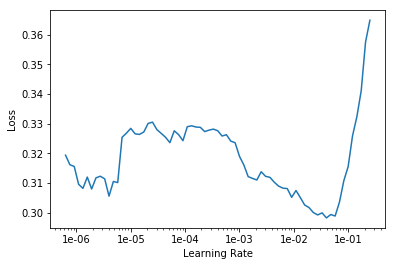

In [ ]:
lrf = learn.lr_find()
learn.recorder.plot()

In [ ]:
lr2 = 4e-3

In [ ]:
learn.fit_one_cycle(5, slice(lr2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.305764,0.276333,0.845801,0.803687
2,0.271555,0.260210,0.869466,0.829225
3,0.241900,0.267586,0.868702,0.813071
4,0.221011,0.267987,0.858779,0.805005
5,0.201711,0.267839,0.854962,0.808285


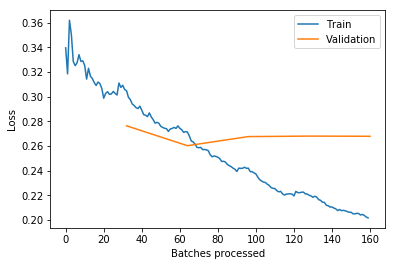

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('res50-256-frozen')

--------

In [ ]:
# learn.load('res50-256-frozen')

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


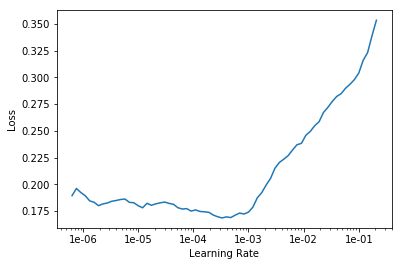

In [ ]:
lrf = learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(4e-5, lr2 / 5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.182738,0.268735,0.887786,0.837288


In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('res50-256-unfrozen')